In [250]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [251]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [253]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [254]:
df.fillna(df['TotalCharges'].mean(), inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [255]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].str.lower().str.replace(' ', '_')
df.head()        

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [256]:
df['seniorcitizen'] = df['seniorcitizen'].astype("object")
df.describe()

,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [257]:
(df==0).sum()

customerid             0
gender                 0
seniorcitizen       5901
partner                0
dependents             0
tenure                11
phoneservice           0
multiplelines          0
internetservice        0
onlinesecurity         0
onlinebackup           0
deviceprotection       0
techsupport            0
streamingtv            0
streamingmovies        0
contract               0
paperlessbilling       0
paymentmethod          0
monthlycharges         0
totalcharges           0
churn                  0
dtype: int64

In [258]:
df = df[df['tenure'] != 0]
(df==0).sum()

customerid             0
gender                 0
seniorcitizen       5890
partner                0
dependents             0
tenure                 0
phoneservice           0
multiplelines          0
internetservice        0
onlinesecurity         0
onlinebackup           0
deviceprotection       0
techsupport            0
streamingtv            0
streamingmovies        0
contract               0
paperlessbilling       0
paymentmethod          0
monthlycharges         0
totalcharges           0
churn                  0
dtype: int64

In [259]:
df.describe(include="object")


,customerid,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-vhveg,male,0,no,no,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,no
freq,1,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [260]:
df['churn'].value_counts()
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.50,no
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.90,no
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,no
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.60,yes


In [261]:
df['churn'] = (df['churn'] == "yes").astype("int64")
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.50,0
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.90,0
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,0
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.60,1


In [262]:
global_mean = df['churn'].mean()
global_mean

0.26578498293515357

In [263]:
categorical = df.select_dtypes("object").columns
categorical = categorical.drop('customerid')
categorical


Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   seniorcitizen     7032 non-null   object 
 3   partner           7032 non-null   object 
 4   dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   object 
 7   multiplelines     7032 non-null   object 
 8   internetservice   7032 non-null   object 
 9   onlinesecurity    7032 non-null   object 
 10  onlinebackup      7032 non-null   object 
 11  deviceprotection  7032 non-null   object 
 12  techsupport       7032 non-null   object 
 13  streamingtv       7032 non-null   object 
 14  streamingmovies   7032 non-null   object 
 15  contract          7032 non-null   object 
 16  paperlessbilling  7032 non-null   object 


In [265]:
for col in categorical:
    df_groups = df.groupby(col).churn.agg(["mean"])
    df_groups["diff"] = df_groups["mean"] - global_mean
    display(df_groups)

,mean,diff
gender,,
female,0.269595,0.003810
male,0.262046,-0.003739


,mean,diff
seniorcitizen,,
0,0.236503,-0.029282
1,0.416813,0.151028


,mean,diff
partner,,
no,0.329761,0.063976
yes,0.197171,-0.068614


,mean,diff
dependents,,
no,0.312791,0.047006
yes,0.155312,-0.110473


,mean,diff
phoneservice,,
no,0.250000,-0.015785
yes,0.267475,0.001690


,mean,diff
multiplelines,,
no,0.250812,-0.014973
no_phone_service,0.250000,-0.015785
yes,0.286485,0.020700


,mean,diff
internetservice,,
dsl,0.189983,-0.075802
fiber_optic,0.418928,0.153143
no,0.074342,-0.191443


,mean,diff
onlinesecurity,,
no,0.417787,0.152002
no_internet_service,0.074342,-0.191443
yes,0.146402,-0.119383


,mean,diff
onlinebackup,,
no,0.399417,0.133632
no_internet_service,0.074342,-0.191443
yes,0.215670,-0.050115


,mean,diff
deviceprotection,,
no,0.391403,0.125618
no_internet_service,0.074342,-0.191443
yes,0.225393,-0.040392


,mean,diff
techsupport,,
no,0.416475,0.150690
no_internet_service,0.074342,-0.191443
yes,0.151961,-0.113824


,mean,diff
streamingtv,,
no,0.335351,0.069566
no_internet_service,0.074342,-0.191443
yes,0.301147,0.035362


,mean,diff
streamingmovies,,
no,0.337289,0.071504
no_internet_service,0.074342,-0.191443
yes,0.299524,0.033739


,mean,diff
contract,,
month-to-month,0.427097,0.161312
one_year,0.112772,-0.153013
two_year,0.028487,-0.237298


,mean,diff
paperlessbilling,,
no,0.163757,-0.102028
yes,0.335893,0.070108


,mean,diff
paymentmethod,,
bank_transfer_(automatic),0.167315,-0.098470
credit_card_(automatic),0.152531,-0.113254
electronic_check,0.452854,0.187069
mailed_check,0.192020,-0.073765


In [266]:
df.drop(["customerid", "gender", "partner", "dependents", "phoneservice", "multiplelines", "streamingmovies"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seniorcitizen     7032 non-null   object 
 1   tenure            7032 non-null   int64  
 2   internetservice   7032 non-null   object 
 3   onlinesecurity    7032 non-null   object 
 4   onlinebackup      7032 non-null   object 
 5   deviceprotection  7032 non-null   object 
 6   techsupport       7032 non-null   object 
 7   streamingtv       7032 non-null   object 
 8   contract          7032 non-null   object 
 9   paperlessbilling  7032 non-null   object 
 10  paymentmethod     7032 non-null   object 
 11  monthlycharges    7032 non-null   float64
 12  totalcharges      7032 non-null   float64
 13  churn             7032 non-null   int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 824.1+ KB


C:\Users\Abd-el-Rahman\AppData\Local\Temp\ipykernel_18272\3762546680.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

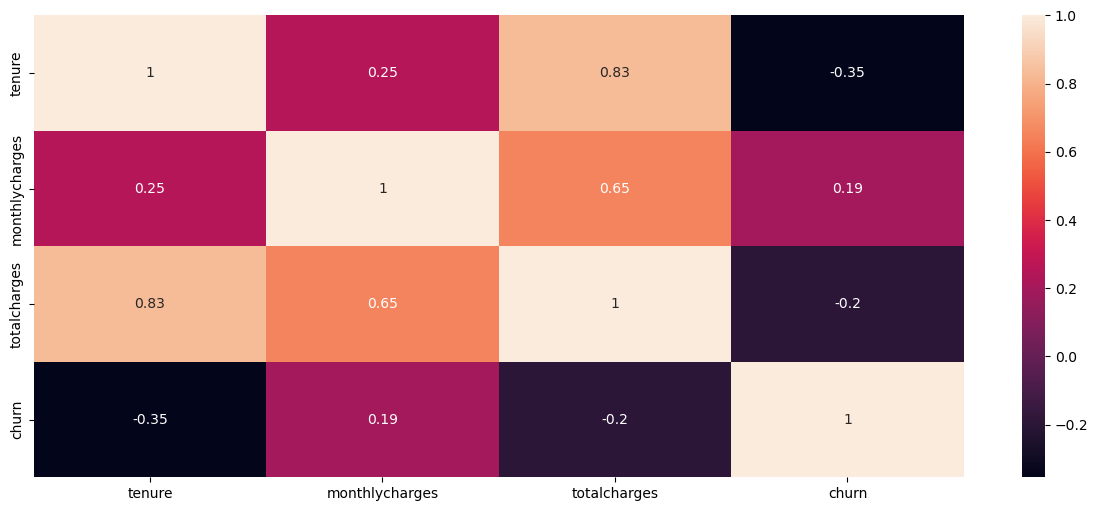

In [267]:
plt.figure(figsize=((15, 6)))
sns.heatmap(df.corr(), annot=True)

In [268]:
df.drop(["totalcharges"], axis=1, inplace=True)
categorical = df.select_dtypes("object").columns
df = pd.get_dummies(df, columns=categorical)
df


C:\Users\Abd-el-Rahman\AppData\Local\Temp\ipykernel_18272\4095195239.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.get_dummies(df, columns=categorical)


,tenure,monthlycharges,churn,seniorcitizen_0,seniorcitizen_1,internetservice_dsl,internetservice_fiber_optic,internetservice_no,onlinesecurity_no,onlinesecurity_no_internet_service,...,streamingtv_yes,contract_month-to-month,contract_one_year,contract_two_year,paperlessbilling_no,paperlessbilling_yes,paymentmethod_bank_transfer_(automatic),paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check
0,1,29.85,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,0,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,1,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,0,1,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,1,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,0,1,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
7039,72,103.20,0,1,0,0,1,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,11,29.60,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
7041,4,74.40,1,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [269]:
x = df.drop(['churn'], axis=1)
y = df["churn"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)
model = LogisticRegression(solver="sag", penalty="l2")
model.fit(x_scaled, y_train)
model.score(x_scaled, y_train)

0.8037333333333333

In [270]:
model.score(x_test, y_test)

c:\Users\Abd-el-Rahman\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.7761194029850746

In [271]:
y_predicted = model.predict_proba(x_test)
y_predicted

c:\Users\Abd-el-Rahman\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[3.41078735e-01, 6.58921265e-01],
       [9.99987416e-01, 1.25840322e-05],
       [4.29789337e-01, 5.70210663e-01],
       ...,
       [3.56700895e-03, 9.96432991e-01],
       [1.00000000e+00, 6.79842423e-16],
       [7.44866994e-01, 2.55133006e-01]])

In [272]:
y_predicted = y_predicted[:, 1]
y_predicted = (y_predicted>0.5).astype("int64")
y_predicted

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [273]:
y = model.predict(x_test)
y

c:\Users\Abd-el-Rahman\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1, 0, 1, ..., 1, 0, 0], dtype=int64)